In [1]:
import pandas as pd
import re
import spacy
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("scopus.csv")

In [3]:
df = df.dropna(subset=['Authors','Abstract','Author Keywords','Index Keywords'])

In [5]:
search_terms = {"control plane", "data plane"}

In [6]:
# Initialize a dictionary to store term occurrences by year
term_occurrences_by_year = defaultdict(lambda: defaultdict(int))

In [8]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [9]:
# Process titles and abstracts to count term occurrences
for index, row in df.iterrows():
    doc = nlp(row["Title"])  # You can also include abstracts here
    for term in search_terms:
        if term in row["Title"].lower():
            term_occurrences_by_year[row["Year"]][term] += 1

In [10]:
# Convert the dictionary to a DataFrame for visualization
occurrences_df = pd.DataFrame(term_occurrences_by_year).T

<Figure size 1000x600 with 0 Axes>

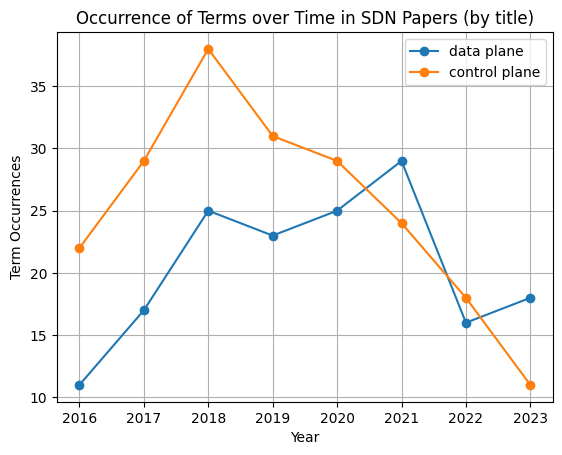

In [12]:
# Plot the term occurrences over time
plt.figure(figsize=(10, 6))
occurrences_df.plot(kind='line', marker='o')
plt.title('Occurrence of Terms over Time in SDN Papers (by title)')
plt.xlabel('Year')
plt.ylabel('Term Occurrences')
plt.grid(True)
plt.legend()
plt.show()